In [46]:
from google.colab import drive

import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [71]:
book_path = "/content/drive/MyDrive/Colab Titanic/train.csv"
train_data = pd.read_csv(book_path)

# Explore data

In [72]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
train_data.shape

(891, 12)

In [74]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [75]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## let's add the missing ages

In [76]:
mean_age = round(train_data['Age'].mean())
train_data.Age.fillna(value=mean_age, inplace=True)

## What about the missing cabin values ?

In [79]:
train_data.Pclass.nunique()

3

In [80]:
tmp = train_data[['Cabin', 'Pclass']].dropna()
print(f"Class 1 cabins : {tmp['Pclass'][tmp['Pclass'] == 1].sum()}")
print(f"Class 2 cabins : {tmp['Pclass'][tmp['Pclass'] == 2].sum()}")
print(f"Class 3 cabins : {tmp['Pclass'][tmp['Pclass'] == 3].sum()}")

Class 1 cabins : 176
Class 2 cabins : 32
Class 3 cabins : 36


In [81]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

A lot of cabin numbers are missing and it seems that everyone had one. It also seems that Pclass is irrelevant in wheter the cabin number is missing or not. So let's remove the column

In [82]:
train_data=train_data.drop(columns='Cabin')

## What about Ticket Number ?

In [83]:
train_data.shape

(891, 11)

In [101]:
train_data.Ticket.isnull().sum()

0

In [97]:
train_data['Ticket'].fillna(value='no ticket', inplace=True)

<Axes: ylabel='Frequency'>

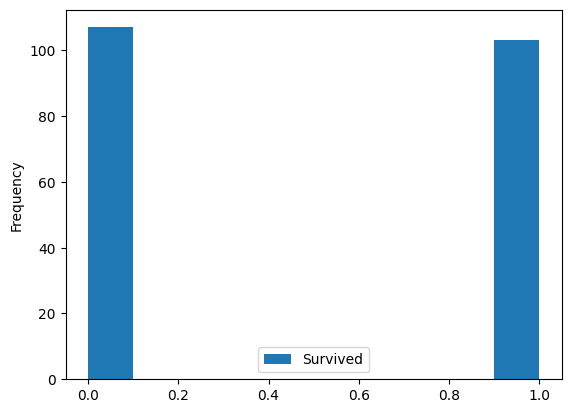

In [100]:
train_data[['Survived', 'Ticket']].loc[train_data['Ticket']=='no ticket'].plot.hist()

People whose ticket number was not recorded didn't die more.

## Let's look at fare

<Axes: xlabel='Fare', ylabel='Count'>

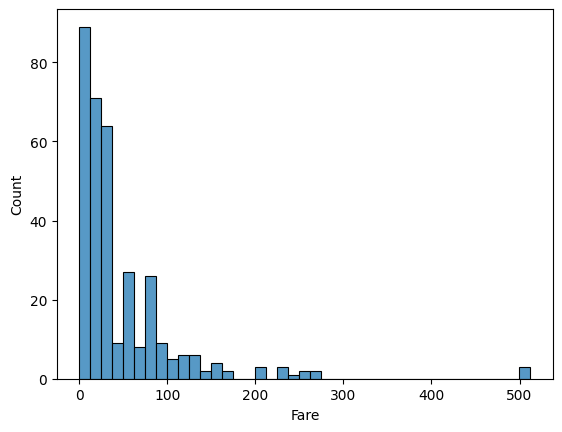

In [111]:
sns.histplot(data=train_data[['Survived', 'Fare']].loc[train_data['Survived']==1], x='Fare')

# Pipeline creation
(to preprocess test data identically)

# Train test split

# Model